<a href="https://colab.research.google.com/github/Henil21/Red_Blue_classification/blob/main/Red_Blue_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from sklearn.datasets import make_circles
import numpy as np
# making 1000 example
n_sample=1000
# create circle
x,y =make_circles(n_sample, 
                  noise=0.03,
                  random_state=42)

In [12]:
import pandas as pd 
circles=pd.DataFrame({"X0":x[:,0],"x1":x[:,1],"label":y})
# circles

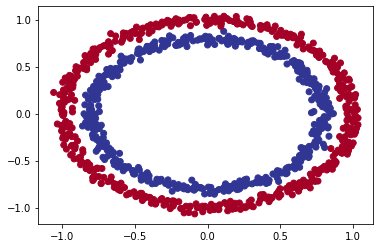

In [13]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [14]:
def plot_decision_boundary(model,x,y):
  """
  plots the decison boundary created by a model predicting on x
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  x_min,x_max  =x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max =x[:,1].min()-0.1,x[:,1].max()+0.1

  # (linspace) return evenly space number between x_min,x_max 
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  x_in=np.c_[xx.ravel(),yy.ravel()]
# making prediction
  y_pred=model.predict(x_in)
  # check for multi class
  if len(y_pred[0])>1:
    print("multiclass")
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("binary")
    y_pred=np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



In [15]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
model_7.fit(x,y,epochs=100,verbose=0)

binary


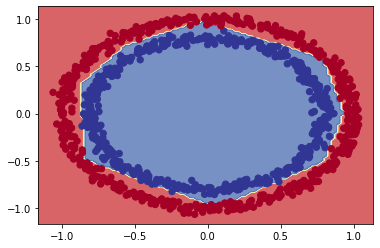

In [16]:
plot_decision_boundary(model_7,x,y)
